# Introduction

Have you ever imagined that you could predict house prices with astounding accuracy, as if you had a real estate crystal ball? In this notebook, we will uncover the secrets behind property values, uncover hidden factors that even experts often miss, and harness the power of data to give you an edge in the competitive property market.

This notebook will focus on solving the problem of home price prediction for prospective property buyers and sellers. The value of a house is not only determined by its location and square footage. Like the characteristics that make up a person's personality, we will dive into all the aspects that give a house its value, including factors that you might not have thought of before.

We will utilize all available feature variables, digging deeper than just surface data, to analyze and predict home prices with high precision. This process will be divided into logical steps that allow us to ensure the cleanest and most realistic data for our model, so as to make accurate predictions.

Ready to explore a world where numbers speak and intuition meets science? Here's the adventure we're about to embark on, which might just change the way you look at home forever:

1. Loading the Necessary Data and Packages
2. Exploratory Data Analysis
3. Data Pre-Processing
4. Model Building
5. Model Evaluation

Through this approach, we will develop a comprehensive understanding of the factors that influence house prices and create reliable predictive models. Let's start the journey towards dominating the property market with the power of data analysis!

The data used comes from the following sources:
https://www.kaggle.com/datasets/ashydv/housing-dataset/data

# 0. Understanding the Client and their Problem

In the dynamic world of property, both home buyers and sellers often face the same dilemma: how to determine the right price? Buyers want to ensure they get the best value for their investment, while sellers seek to maximize profits without spending too long on the market.

The main problem both parties face is the lack of comprehensive and objective information. Traditional valuations often rely on intuition and simple comparisons, which can overlook important factors that affect the true value of a property.

Benefits for Clients (Buyers):

1. More informed decision making: Buyers can understand the true value of the property based on various factors, not just the asking price.
2. Better negotiation: With an in-depth understanding of the factors that influence price, buyers can negotiate with more confidence.
3. Identify undervalued properties: Predictive models can help buyers spot properties that may be sold below their market value.

Advantages for Sellers:

1. Accurate pricing: Sellers can set competitive yet profitable prices based on objective data analysis.
2. Better market understanding: Sellers can understand what features are most valued in the current market.
3. Increased property value: By knowing the factors that increase value, sellers can make appropriate improvements before selling.

Using the data analysis and predictive models that we develop, both buyers and sellers will have powerful tools to navigate the property market more intelligently and profitably. This is why this project is not only academically interesting, but also has significant practical implications in the real world.

# 1. Loading Data and Packages

In [1]:
import xgboost as xgb
import warnings
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import lightgbm as lgb

from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler, Normalizer, RobustScaler,PolynomialFeatures
from sklearn.model_selection import train_test_split, learning_curve, cross_val_score, GridSearchCV
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression,Lasso, LassoCV, Ridge, LassoLarsCV,ElasticNetCV, ElasticNet
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, ExtraTreesRegressor, GradientBoostingRegressor
from scipy.stats.stats import pearsonr
from scipy.stats import skew, norm
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
from collections import Counter

warnings.filterwarnings('ignore')
sns.set(style='white', context='notebook', palette='deep')
%config InlineBackend.figure_format = 'retina' #set 'png' here when working on notebook
%matplotlib inline

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)
<ipython-input-1-cadef485227c>:17: DeprecationWarning: Please import `pearsonr` from the `scipy.stats` namespace; the `scipy.stats.stats` namespace is deprecated and will be removed in SciPy 2.0.0.
  from scipy.stats.stats import pearsonr


In [2]:
# Load the head of the dataset
data = pd.read_csv("Housing.csv")
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


## 1.1 Data Inspection

In [3]:
data.info()
print("-------------------------")
print("Data Shape :",data.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB
-------------------------
Data Shape : (545, 13)


In [4]:
data.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


## 1.2 Data Cleaning

In [5]:
# Checking Null values
data.isnull().sum()*100/data.shape[0]

,0
price,0.0
area,0.0
bedrooms,0.0
bathrooms,0.0
stories,0.0
mainroad,0.0
guestroom,0.0
basement,0.0
hotwaterheating,0.0
airconditioning,0.0


There are no NULL values in the dataset, so this dataset can be said to be a clean dataset.

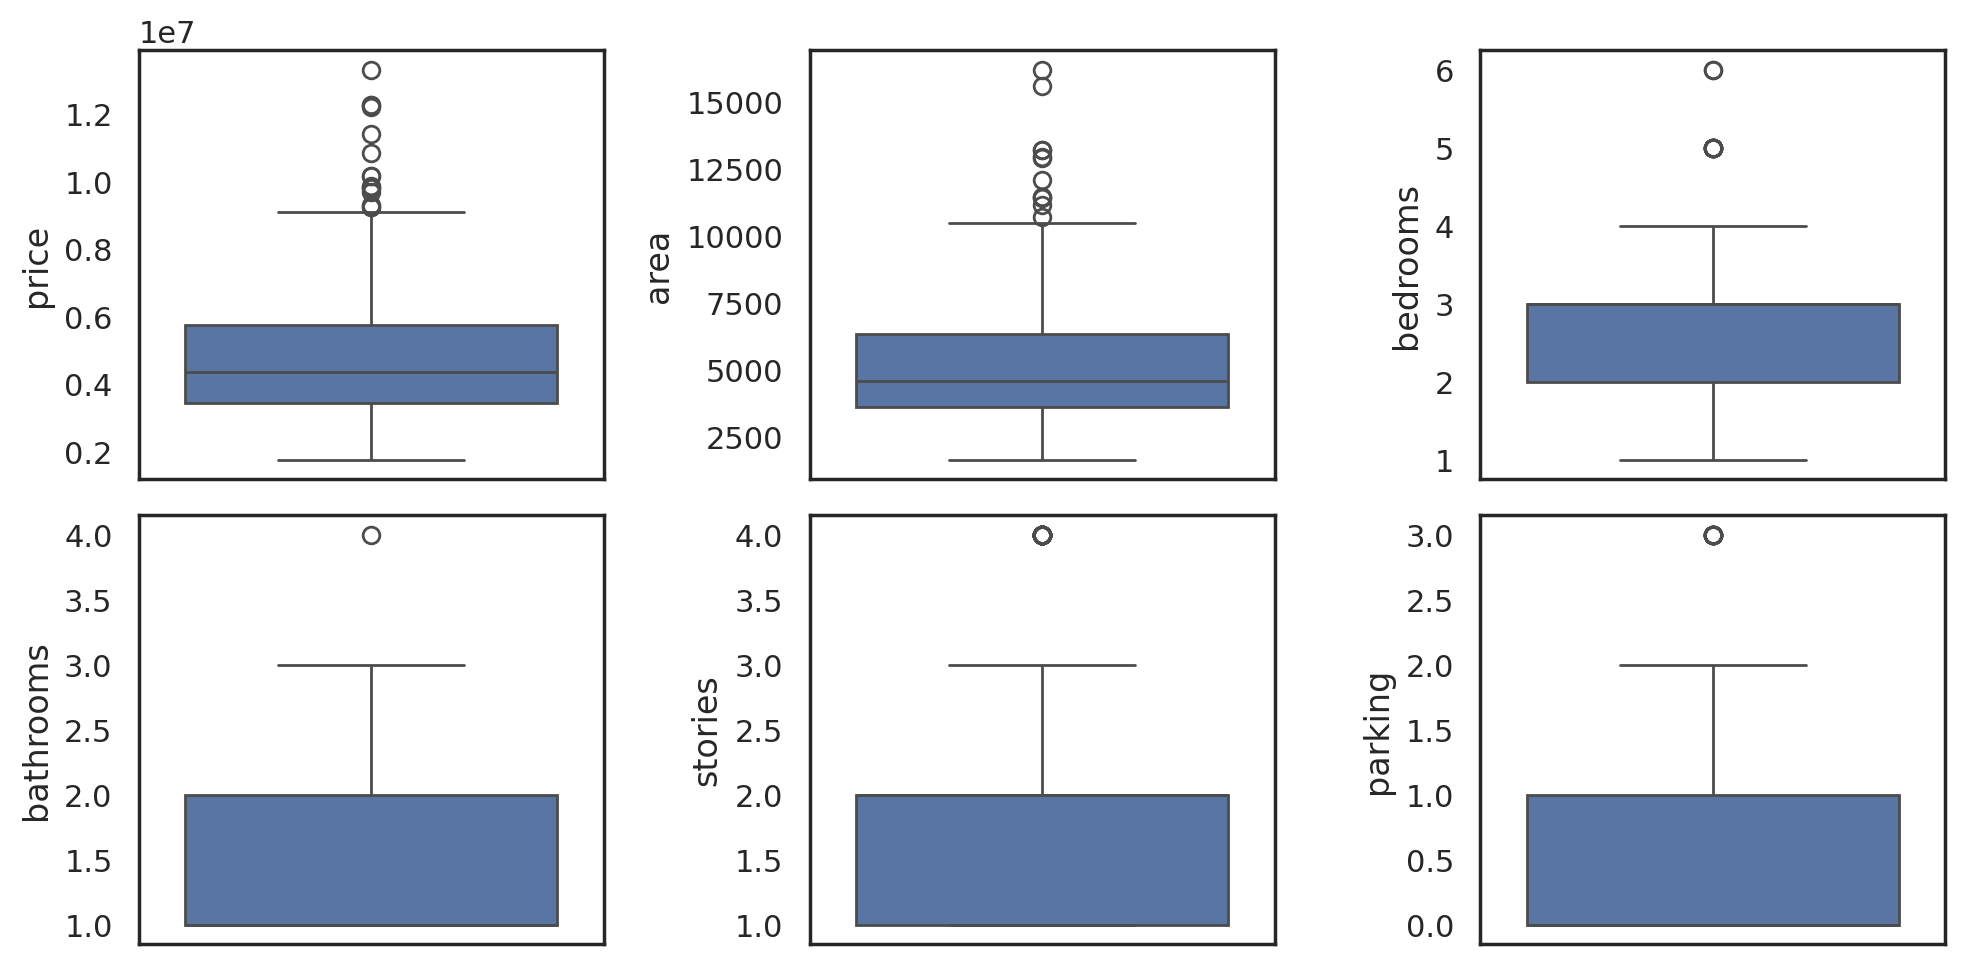

In [6]:
# Outlier Analysis
fig, axs = plt.subplots(2,3, figsize = (10,5))
plt1 = sns.boxplot(data['price'], ax = axs[0,0])
plt2 = sns.boxplot(data['area'], ax = axs[0,1])
plt3 = sns.boxplot(data['bedrooms'], ax = axs[0,2])
plt4 = sns.boxplot(data['bathrooms'], ax = axs[1,0])
plt5 = sns.boxplot(data['stories'], ax = axs[1,1])
plt6 = sns.boxplot(data['parking'], ax = axs[1,2])

plt.tight_layout()

It can be seen that there are many outliers in the price and area variables. We can't remove the outliers because we do not have too much data and if the data is removed, the data used for analysis will be small.

# 2 Exploratory Data Analytics

Now, let's focus on arguably the most crucial stage of our analysis: diving deep into and understanding the data. This phase serves several important purposes:

1. Initial Detection of Multicollinearity: This is where we can catch early signs of a strong linear relationship between the predictor variables, which could affect our model.

2. Identification of Strong Relationships: We will observe whether there are certain predictors that show a direct and significant association with our target variable.

3. Discovery of Hidden Patterns: By exploring the data thoroughly, we may discover patterns or relationships that are not apparent at first glance.

This deep understanding will serve as a solid foundation for the next steps of the analysis, ensuring that the model we build later truly reflects the reality of our data.

### Visualising Numeric Variables

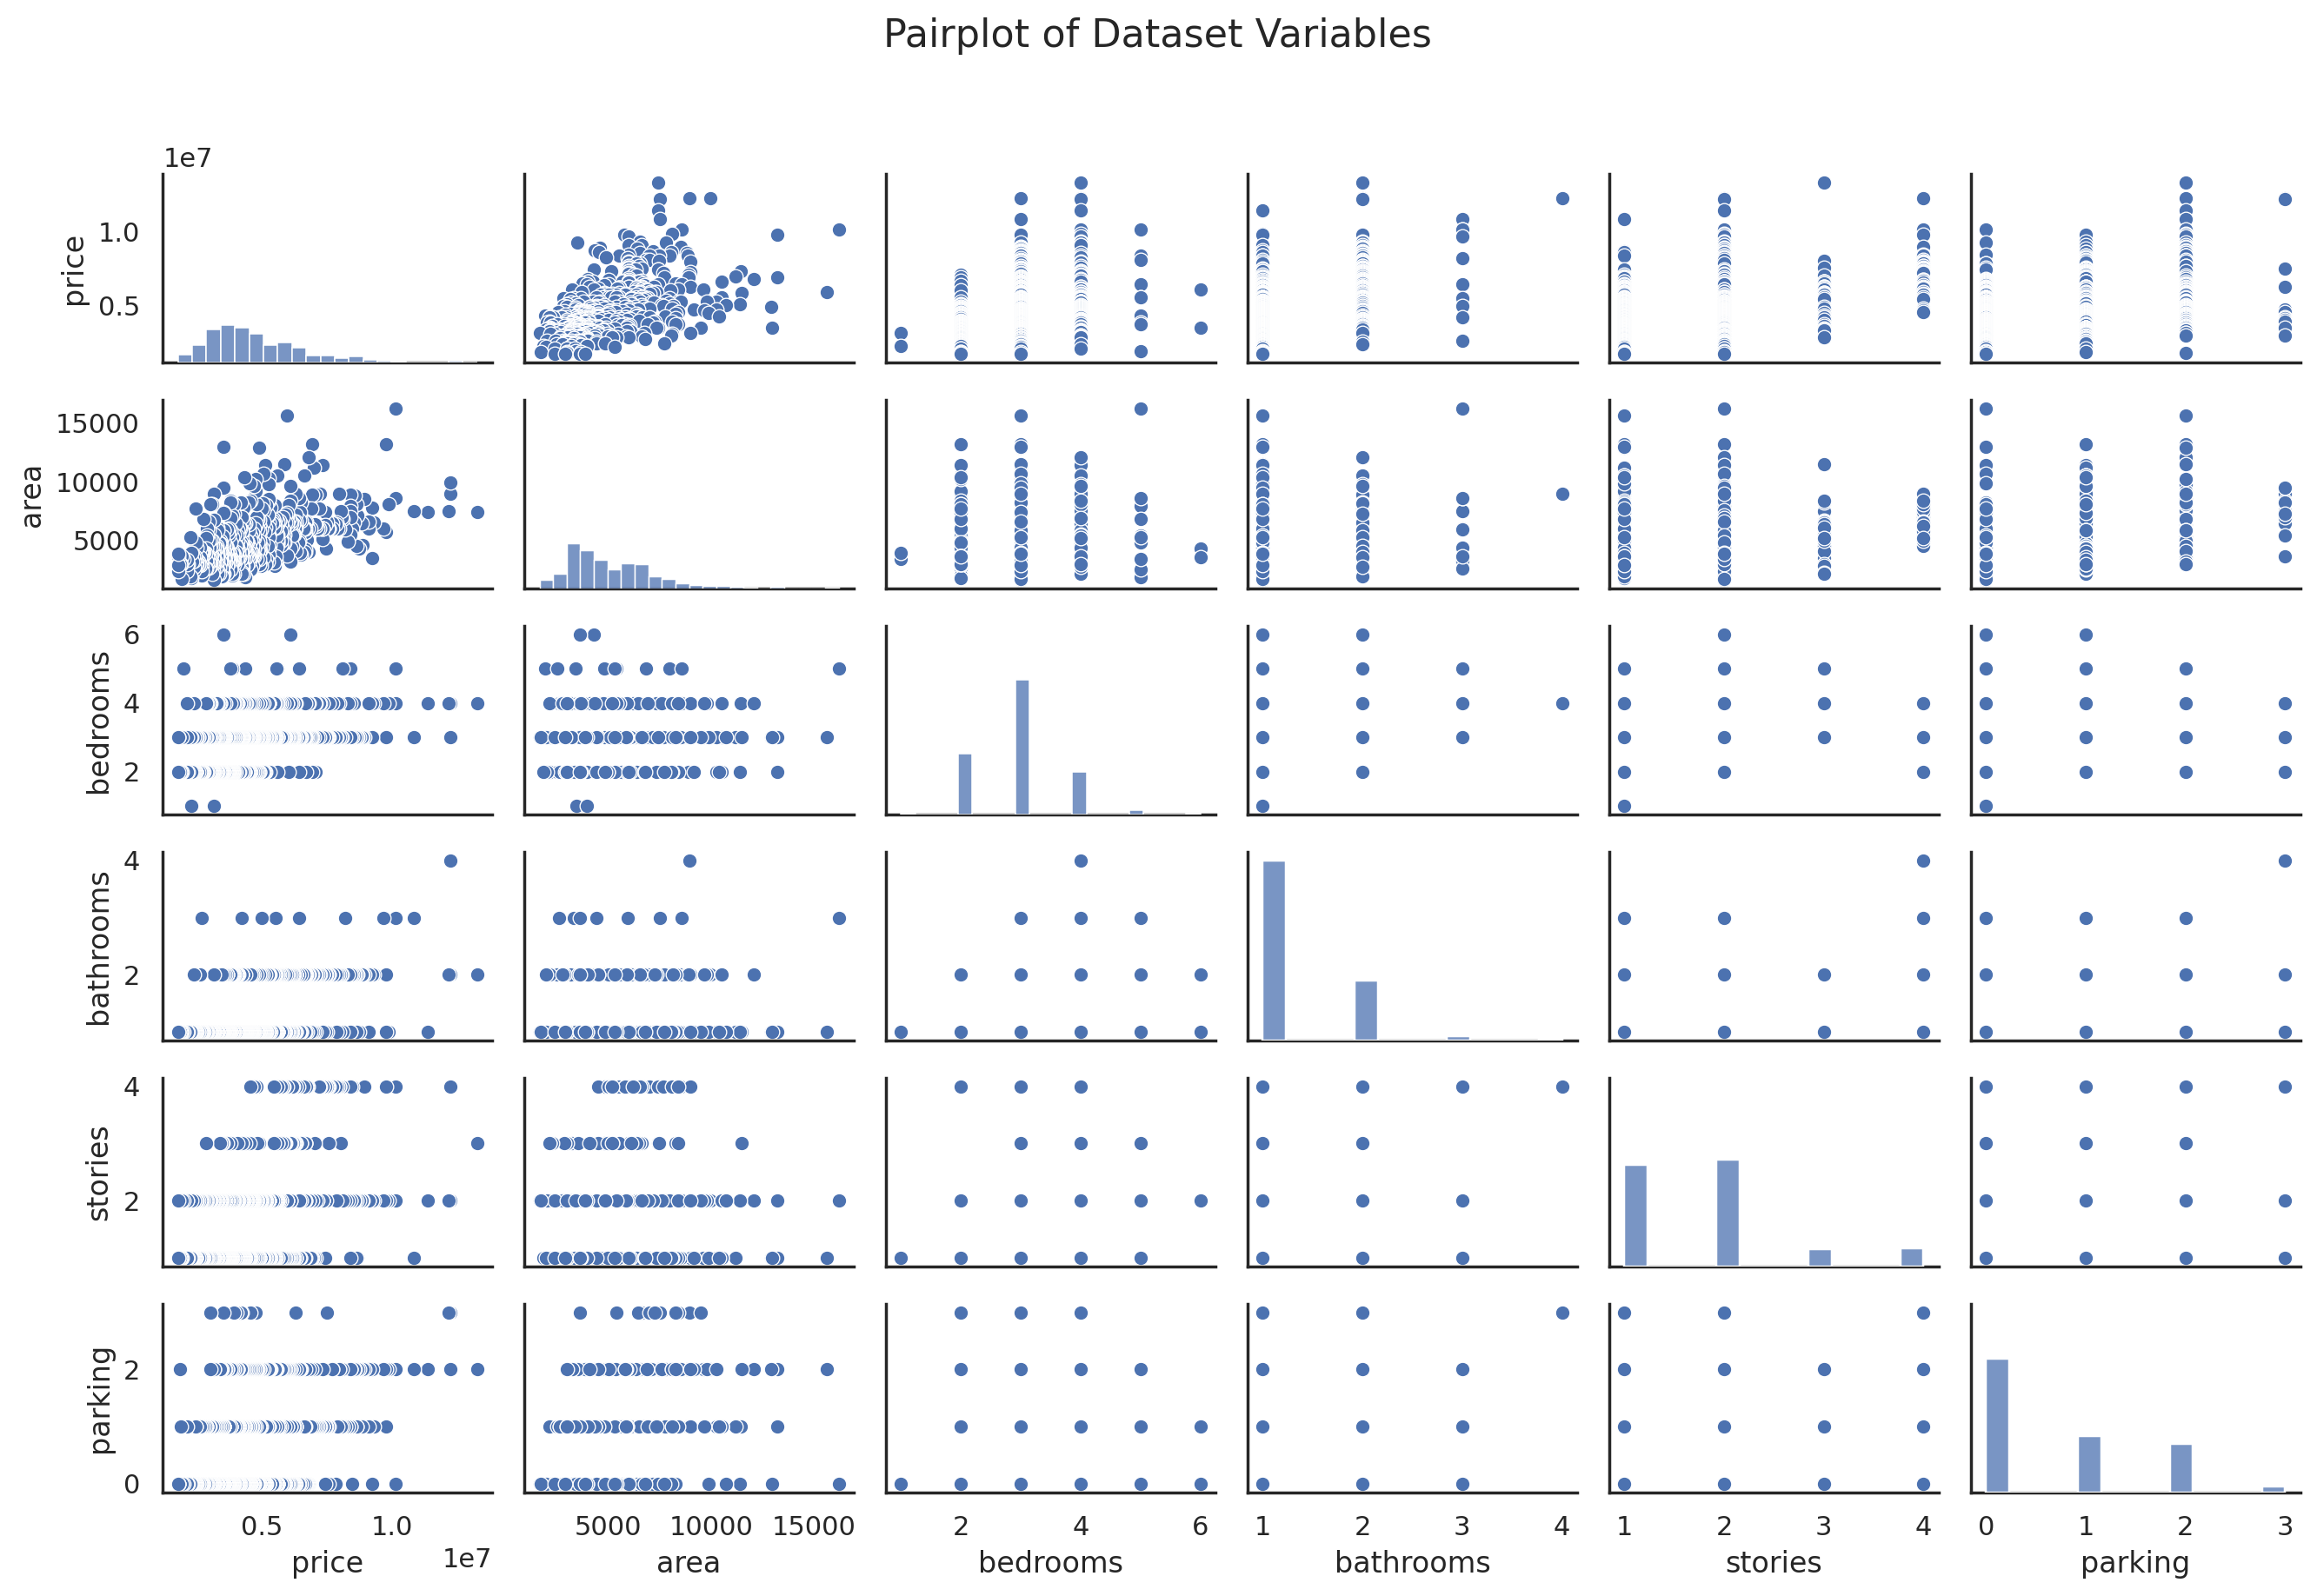

In [7]:
# Create a pairplot with changed size
sns.pairplot(data, height=1.5, aspect=1.5)

# Add a main title
plt.suptitle("Pairplot of Dataset Variables", y=1.02, fontsize=16)

# Customize the layout and display the plot
plt.tight_layout()
plt.show()

### Visualising Categorical Variables

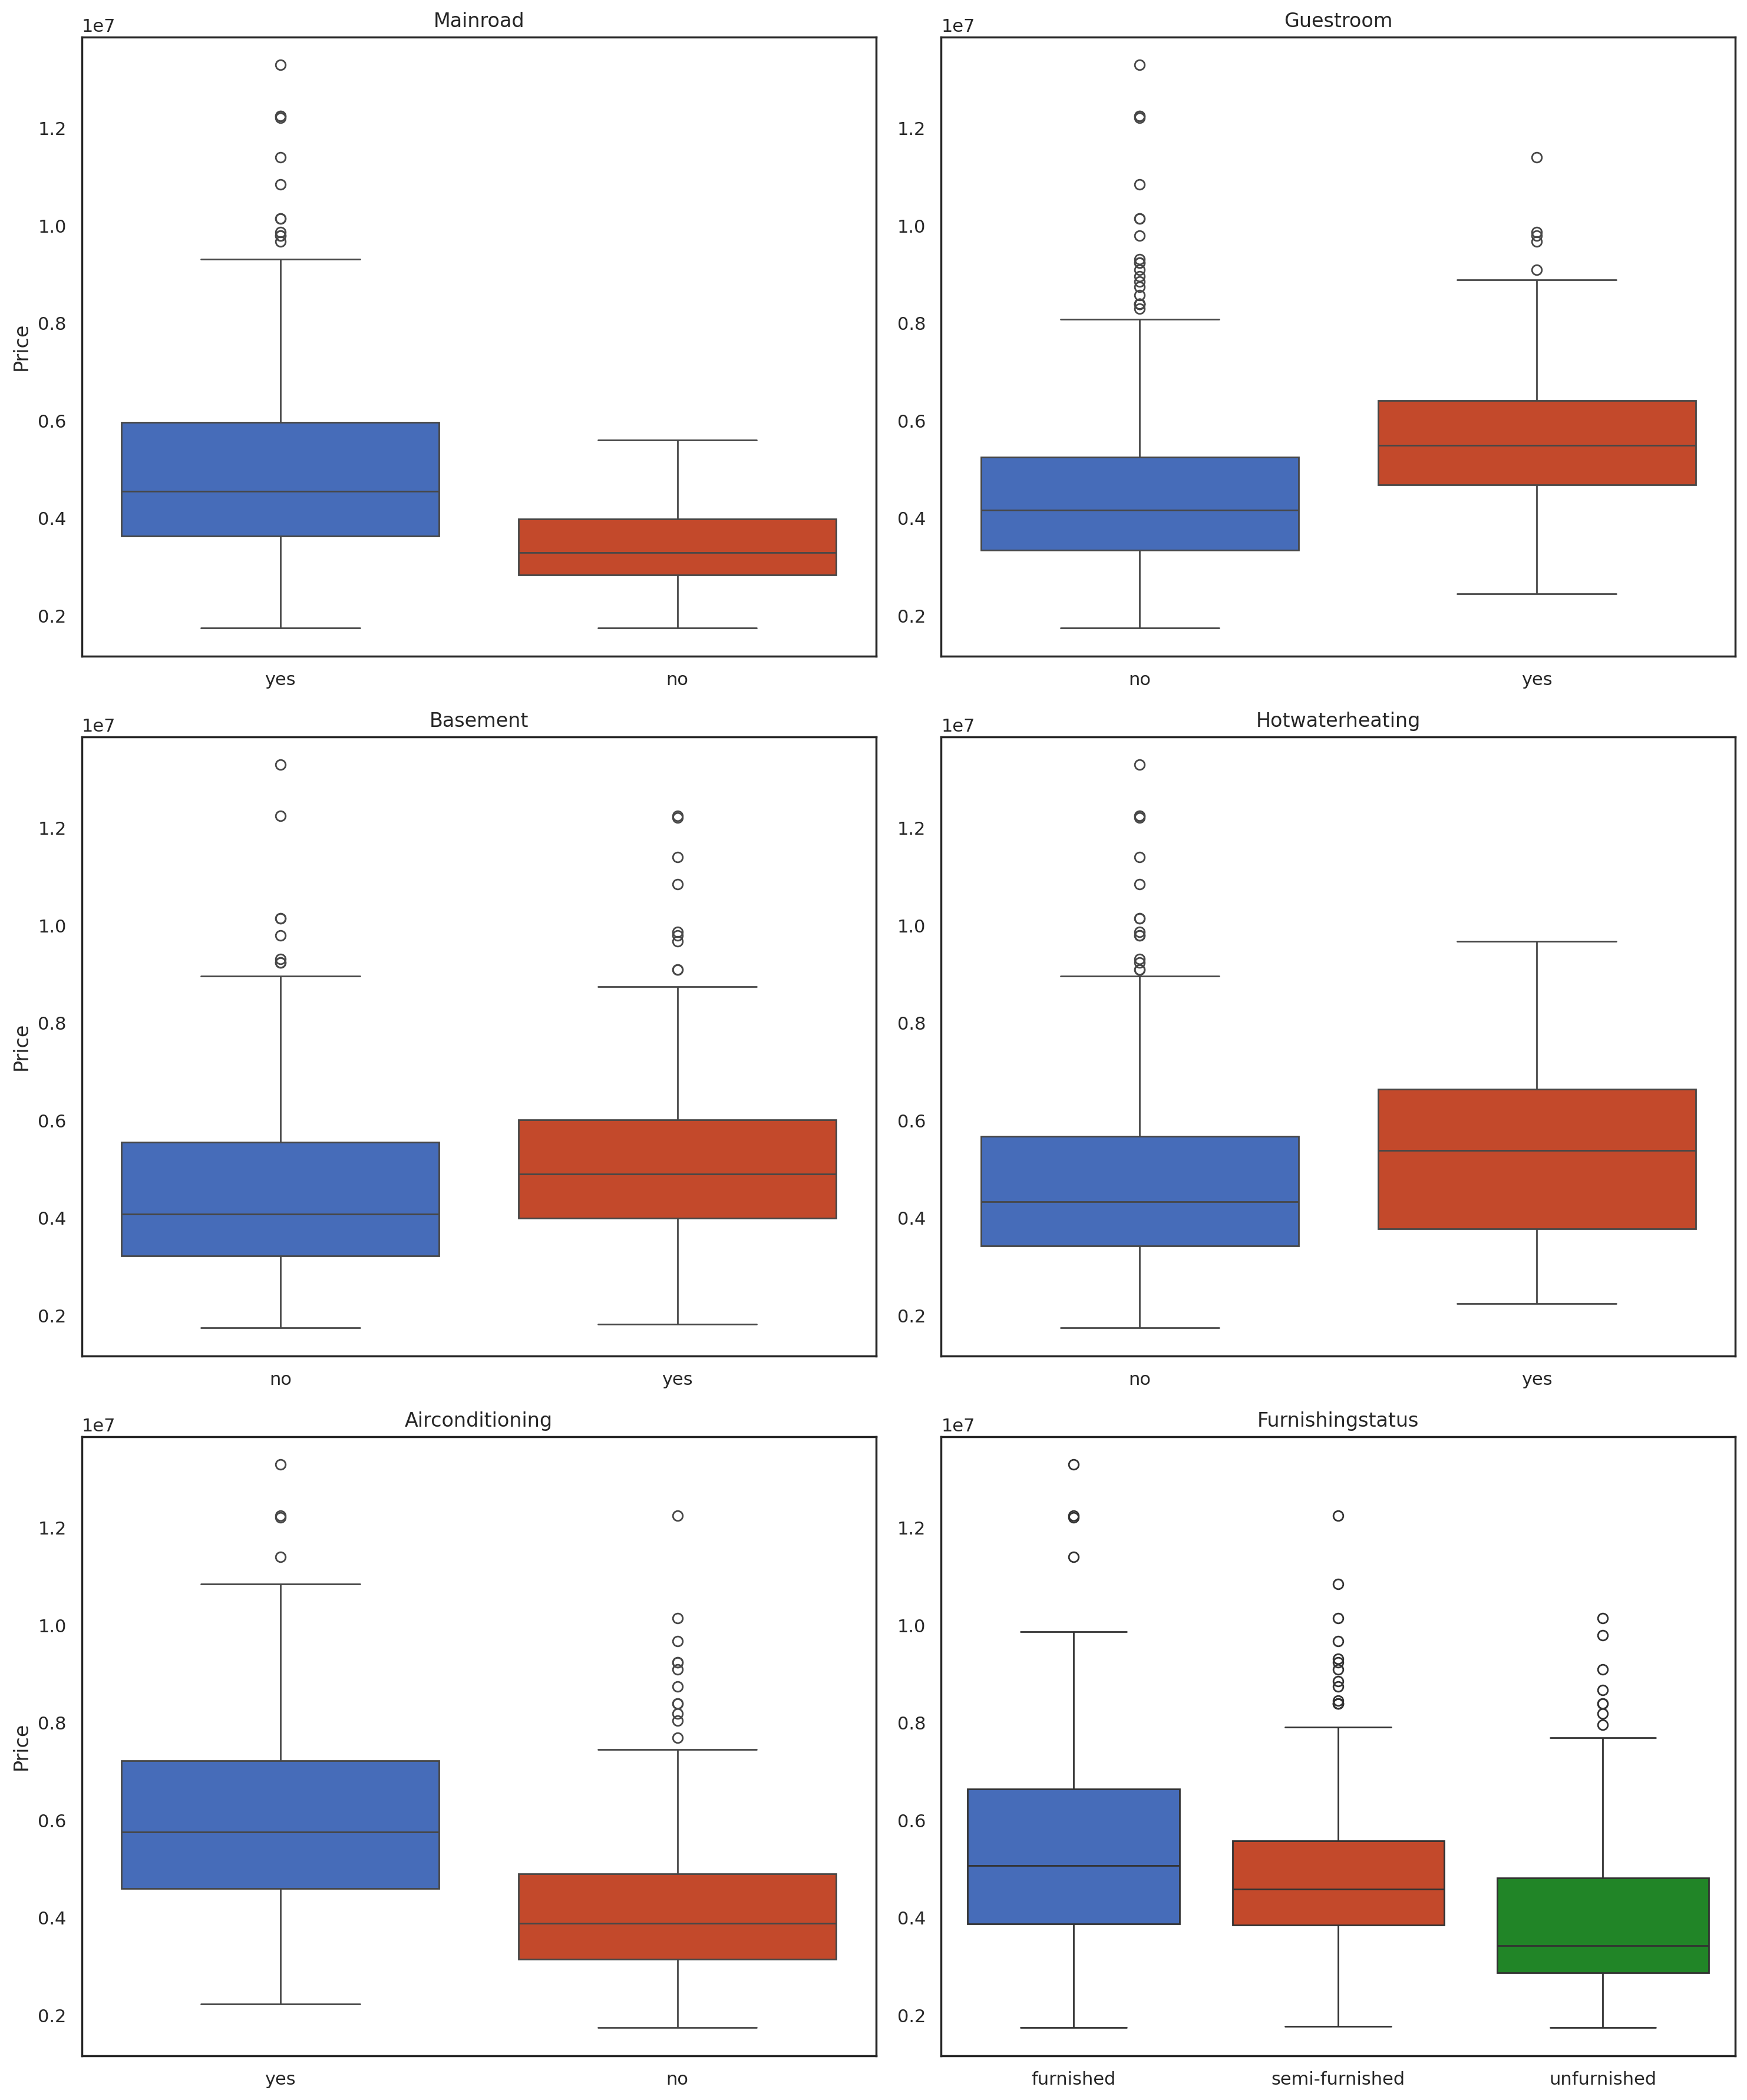

In [8]:
features = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'furnishingstatus']

# Creating a color palette
color_scheme = ['#3366CC', '#DC3912', '#109618']

fig, axes = plt.subplots(3, 2, figsize=(15, 18))

for i, feature in enumerate(features):
    ax = axes[i//2, i%2]
    n_categories = data[feature].nunique()
    palette = color_scheme[:n_categories]
    sns.boxplot(x=feature, y='price', data=data, ax=ax, palette=palette)
    ax.set_title(feature.capitalize())
    ax.set_xlabel('')
    ax.set_ylabel('Price' if i % 2 == 0 else '')

plt.tight_layout()
plt.show()

### Visualising Target Variables (Price)


 mu = 4766729.25 and sigma = 1868722.83



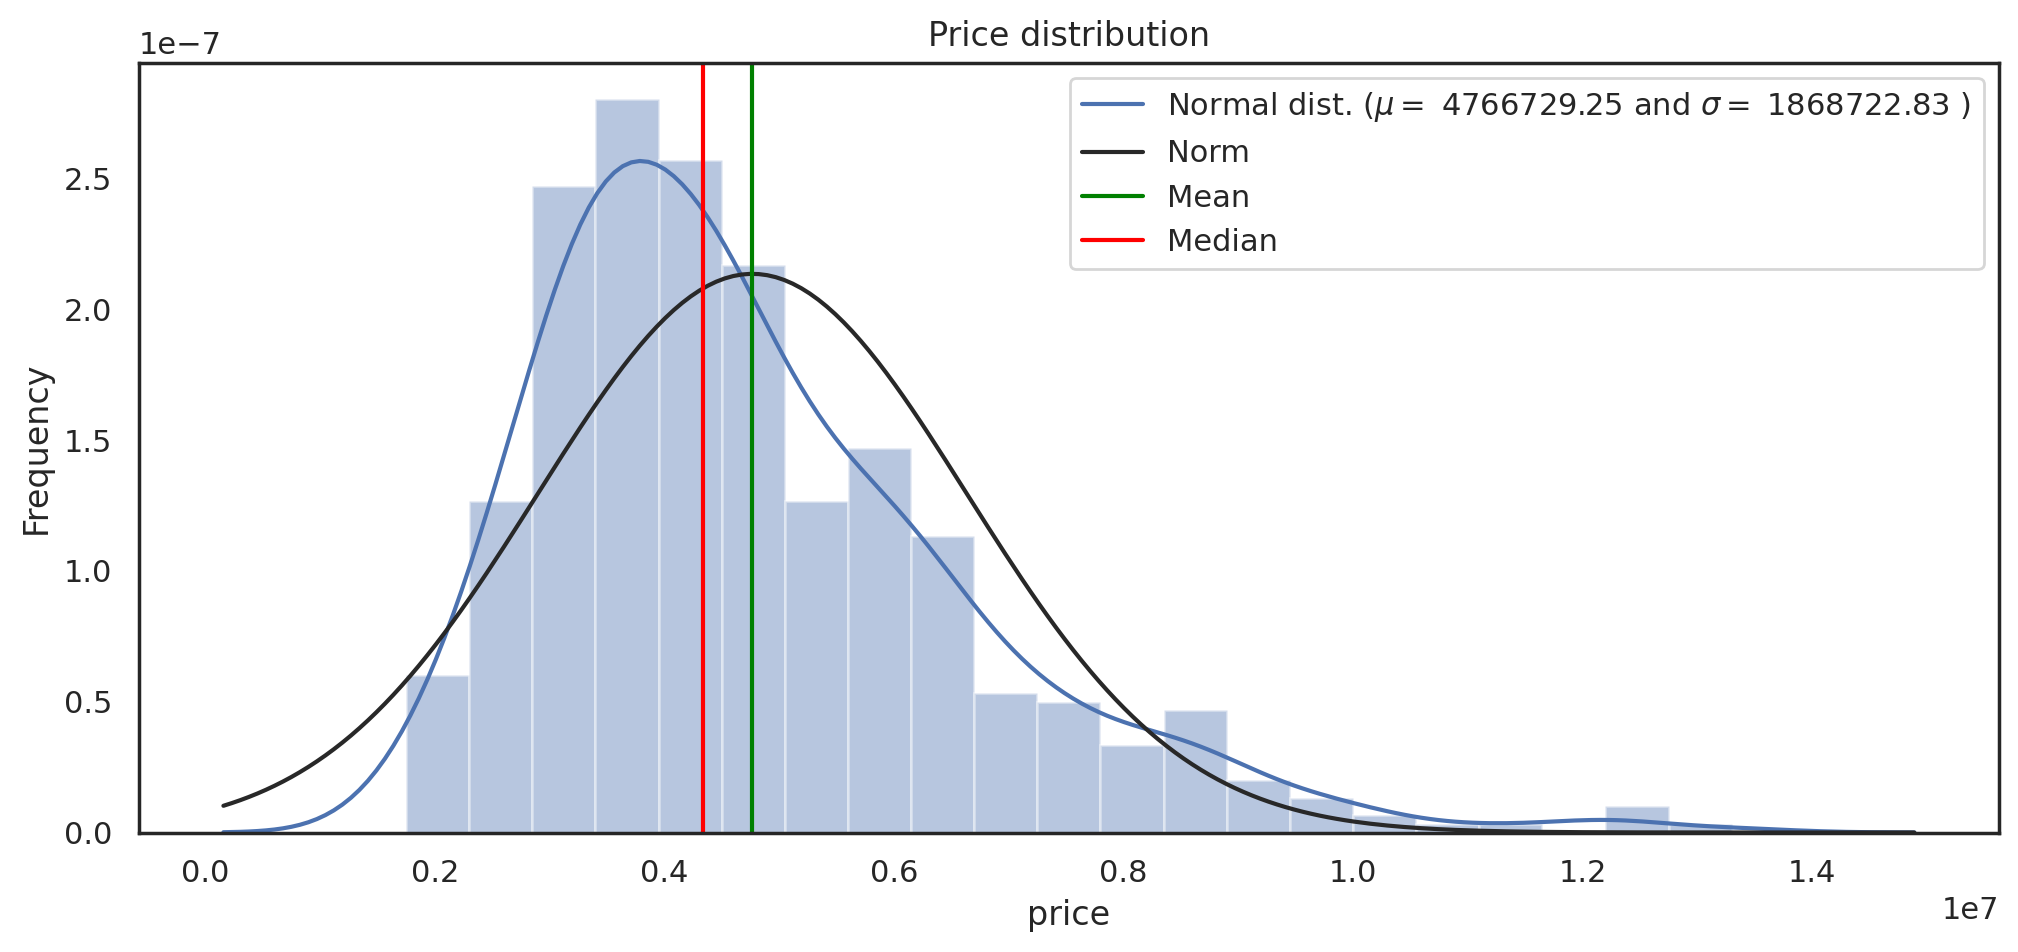

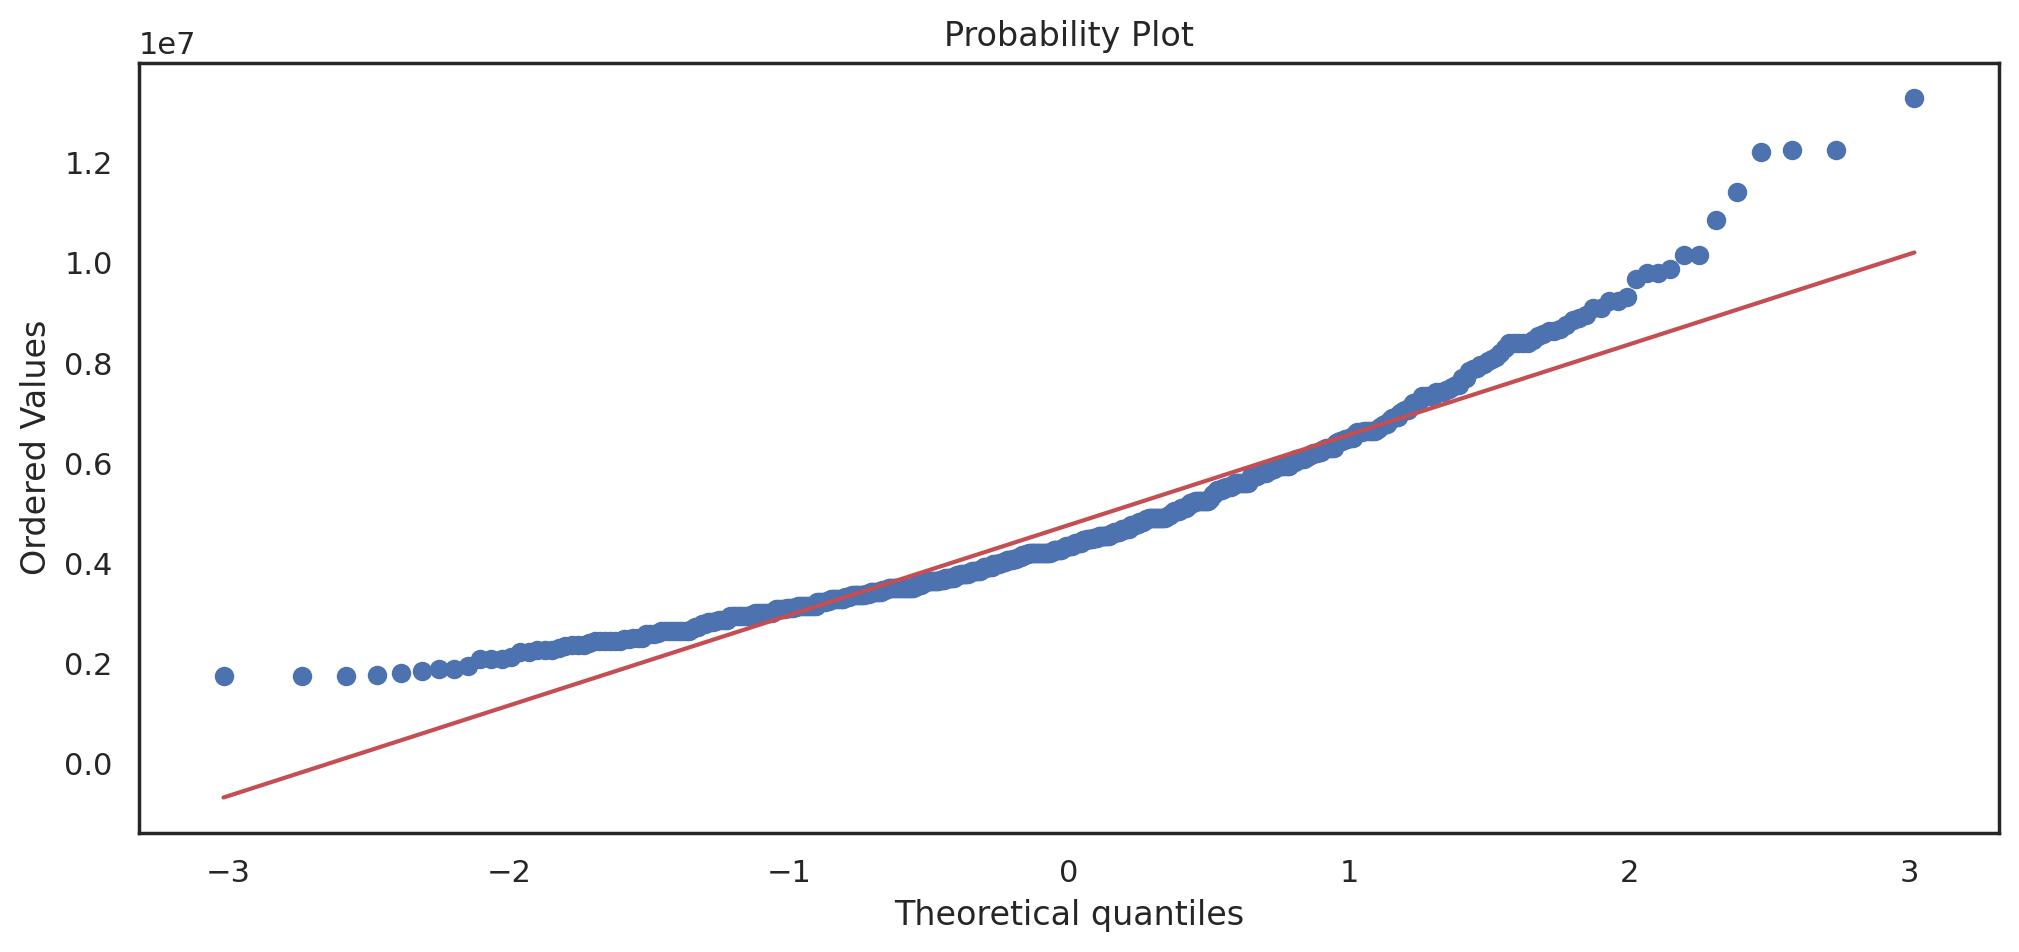

Skewness: 1.212239
Kurtosis: 1.960130


In [9]:
# Plot Histogram
plt.figure(figsize = (12, 5))
sns.distplot(data['price'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(data['price'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

# Find the mean, median, mode
mean_price = data["price"].mean()
median_price = data["price"].median()

# Add vertical lines at the position of mean, median, mode
plt.axvline(mean_price, color="green", label="Mean")
plt.axvline(median_price, color="red", label="Median")

plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma), 'Norm', 'Mean', 'Median'],
            loc='best')
plt.ylabel('Frequency')
plt.title('Price distribution')

fig = plt.figure(figsize = (12, 5))
res = stats.probplot(data['price'], plot=plt)
plt.show()

print("Skewness: %f" % data['price'].skew())
print("Kurtosis: %f" % data['price'].kurt())

If we look at the kurtosis value, we can see that the plot has an excess kurtosis of 1.96, which means that the plot has sharper peaks than a normal distribution. In addition, by looking at the skewness value, we can see that the plot is highly skewed because it is more than 1. Therefore, we must correct the distribution of the data so that the data is normal.

# 3. Data Pre-Processing

Our dataset contains several columns with categorical data, specifically values limited to 'Yes' or 'No'. To prepare this data for regression analysis, which requires numerical inputs, we must transform these categorical values into numerical ones. This involves converting 'Yes' to 1 and 'No' to 0. This process is essential to ensure compatibility with the regression model.

In [10]:
import pandas as pd
from scipy import stats

def transform_boxcox(data):
  transformed_data = data.copy()
  lambdas = []
  for col in data.columns:
    if pd.api.types.is_numeric_dtype(data[col]):
      # Apply Box-Cox transformation
      transformed_data[col], lambda_ = stats.boxcox(data[col])
      lambdas.append(lambda_)
    else:
      # Skip non-numerical columns
      pass
  return transformed_data, lambdas

transformed_data, lambdas = transform_boxcox(data[['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']] + 1e-8)  # Add a small constant to avoid zeros
transformed_data.head()

,price,area,bedrooms,bathrooms,stories,parking
0,6.611014,5.406139,1.849686,2.118678e-01,0.884875,0.685645
1,6.601930,5.468225,1.849686,2.211456e-01,1.058006,1.079847
2,6.601930,5.502430,1.377835,2.118678e-01,0.603522,0.685645
3,6.601612,5.409708,1.849686,2.118678e-01,0.603522,1.079847
4,6.594002,5.406139,1.849686,1.000000e-08,0.603522,0.685645


In [11]:
# List of variables to map
varlist =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

# Defining the map function
def binary_map(x):
    return x.map({'yes': 1, "no": 0})

# Applying the function to the housing list
OHE = data[varlist].apply(binary_map)

In [12]:
# Get the dummy variables for the feature 'furnishingstatus'
status = pd.get_dummies(data['furnishingstatus'])
status = pd.get_dummies(data['furnishingstatus'], drop_first = True)
status = status.astype(int)
new_data = pd.concat([transformed_data, OHE, status], axis = 1)

In [13]:
new_data.head()

,price,area,bedrooms,bathrooms,stories,parking,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,semi-furnished,unfurnished
0,6.611014,5.406139,1.849686,2.118678e-01,0.884875,0.685645,1,0,0,0,1,1,0,0
1,6.601930,5.468225,1.849686,2.211456e-01,1.058006,1.079847,1,0,0,0,1,0,0,0
2,6.601930,5.502430,1.377835,2.118678e-01,0.603522,0.685645,1,0,1,0,0,1,1,0
3,6.601612,5.409708,1.849686,2.118678e-01,0.603522,1.079847,1,0,1,0,1,1,0,0
4,6.594002,5.406139,1.849686,1.000000e-08,0.603522,0.685645,1,1,1,0,1,0,0,0



 mu = 6.48 and sigma = 0.05



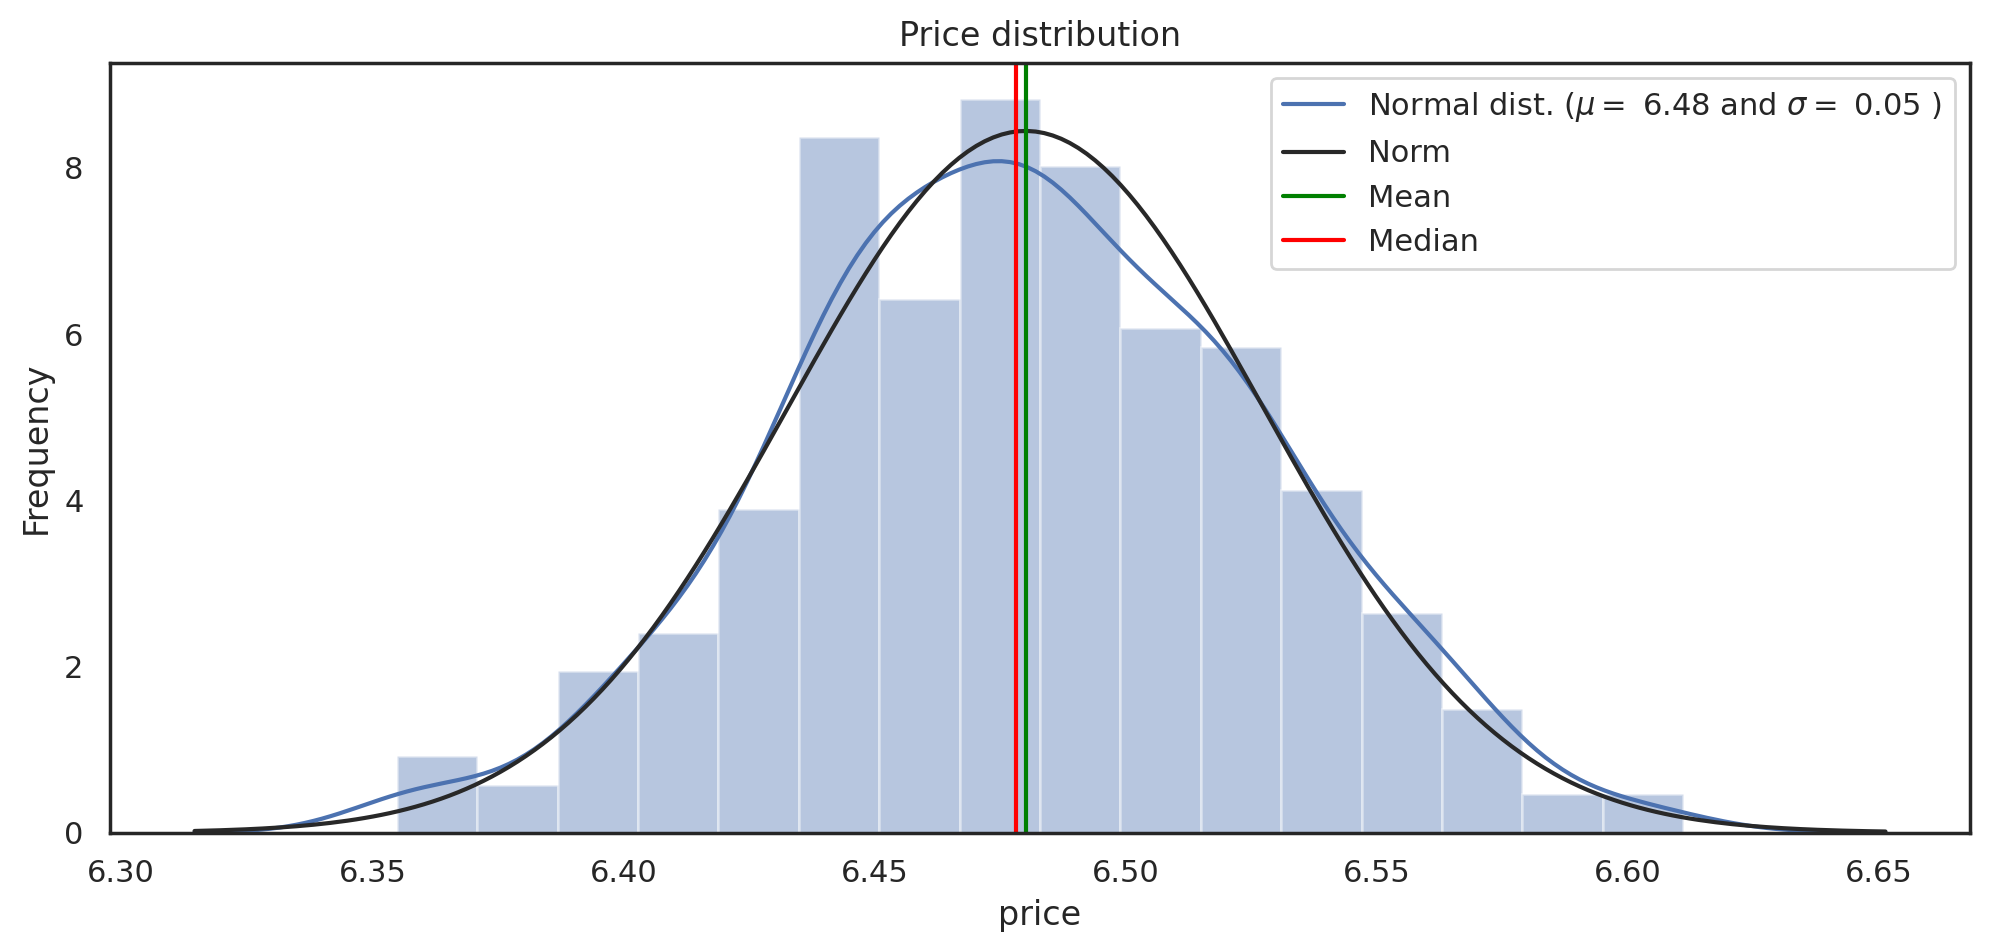

Skewness: 0.002774
Kurtosis: -0.149130


In [14]:
# Plot Histogram
plt.figure(figsize = (12, 5))
sns.distplot(new_data['price'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(new_data['price'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

# Find the mean, median, mode
mean_price = new_data["price"].mean()
median_price = new_data["price"].median()

# Add vertical lines at the position of mean, median, mode
plt.axvline(mean_price, color="green", label="Mean")
plt.axvline(median_price, color="red", label="Median")

plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma), 'Norm', 'Mean', 'Median'],
            loc='best')
plt.ylabel('Frequency')
plt.title('Price distribution')
plt.show()

print("Skewness: %f" % new_data['price'].skew())
print("Kurtosis: %f" % new_data['price'].kurt())

Now we can see that the plot has a kurtosis of -0.15, which means that the plot has peaks similar to the peaks in a normal distribution. Also, by looking at the skewness value (0.003), we can see that the plot can be said to be symmetrical. Therefore, this data can be said to be normally distributed.

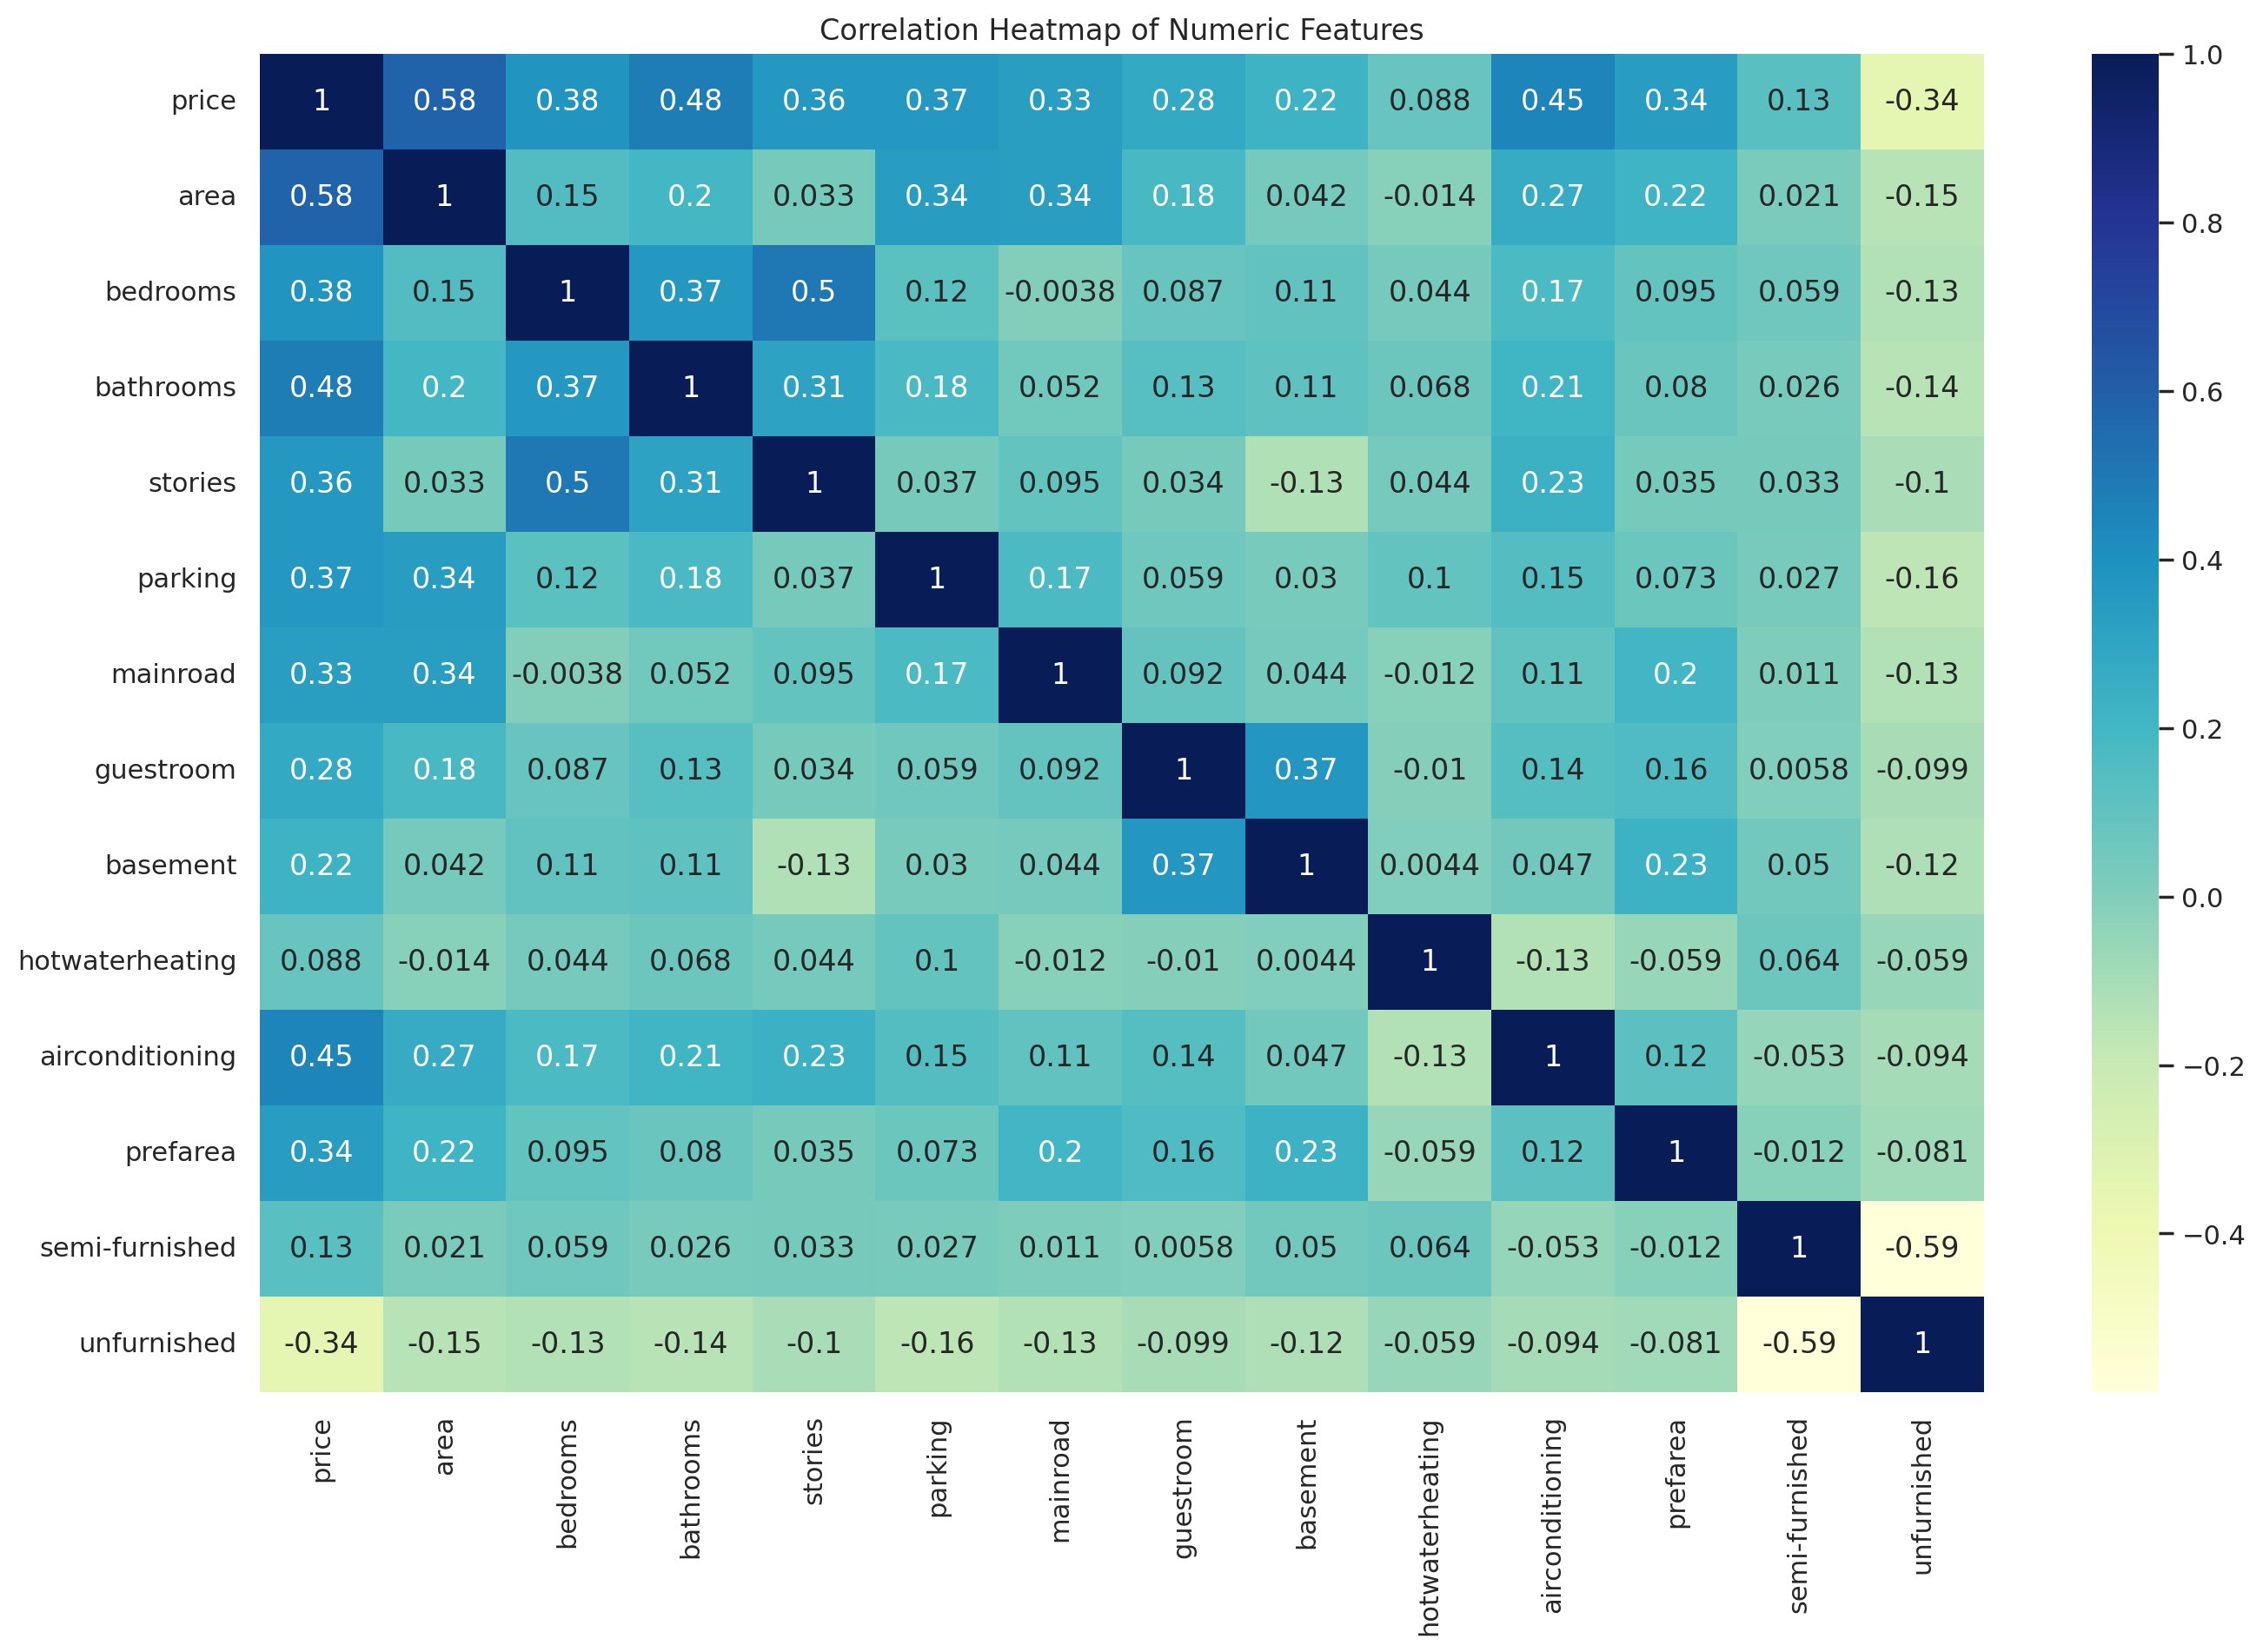

In [15]:
# Correlation Matrix Heatmap
plt.figure(figsize = (16, 10))
sns.heatmap(new_data.corr(), annot = True, cmap="YlGnBu")
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

# 4. Model Building

In [16]:
# We specify this so that the train and test data set always have the same rows, respectively
X = new_data
y = new_data.pop('price')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
# Defining several evaluation functions for convenience
def rmse_cv(model):
    rmse = round((np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=5)).mean()),2)
    return rmse

def evaluation(y, predictions):
    mae = round((mean_absolute_error(y, predictions)),2)
    mse = round((mean_squared_error(y, predictions)),2)
    rmse = round((np.sqrt(mean_squared_error(y, predictions))),2)
    r_squared = round((r2_score(y, predictions)),2)
    return mae, mse, rmse, r_squared

## Machine Leaning Model

In [18]:
models = pd.DataFrame(columns=["Model","MAE","MSE","RMSE","R2 Score Train","R2 Score Test","RMSE (Cross-Validation)"])

In [19]:
# Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
train_predictions = lin_reg.predict(X_train)
predictions = lin_reg.predict(X_test)

train_r2 = round((r2_score(y_train, train_predictions)),2)
mae, mse, rmse, r_squared = evaluation(y_test, predictions)
rmse_cross_val = rmse_cv(lin_reg)

new_row = {"Model": "LinearRegression","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score Train": train_r2, "R2 Score Test":r_squared,"RMSE (Cross-Validation)": rmse_cross_val}
models = pd.concat([models, pd.DataFrame([new_row])], ignore_index=True)

# Ridge Regression
ridge = Ridge()
ridge.fit(X_train, y_train)
train_predictions = ridge.predict(X_train)
predictions = ridge.predict(X_test)

train_r2 = round((r2_score(y_train, train_predictions)),2)
mae, mse, rmse, r_squared = evaluation(y_test, predictions)
rmse_cross_val = rmse_cv(ridge)

new_row = {"Model": "Ridge","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score Train": train_r2, "R2 Score Test":r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = pd.concat([models, pd.DataFrame([new_row])], ignore_index=True)

# SVR
svr = SVR(C=100000)
svr.fit(X_train, y_train)
train_predictions = svr.predict(X_train)
predictions = svr.predict(X_test)

train_r2 = round((r2_score(y_train, train_predictions)),2)
mae, mse, rmse, r_squared = evaluation(y_test, predictions)
rmse_cross_val = rmse_cv(svr)

new_row = {"Model": "SVR","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score Train": train_r2, "R2 Score Test":r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = pd.concat([models, pd.DataFrame([new_row])], ignore_index=True)

# Random Forest
random_forest = RandomForestRegressor(n_estimators=100)
random_forest.fit(X_train, y_train)
train_predictions = random_forest.predict(X_train)
predictions = random_forest.predict(X_test)

train_r2 = round((r2_score(y_train, train_predictions)),2)
mae, mse, rmse, r_squared = evaluation(y_test, predictions)
rmse_cross_val = rmse_cv(random_forest)

new_row = {"Model": "RandomForestRegressor","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score Train": train_r2, "R2 Score Test":r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = pd.concat([models, pd.DataFrame([new_row])], ignore_index=True)

# XGBoost
xgb = XGBRegressor(n_estimators=1000, learning_rate=0.01)
xgb.fit(X_train, y_train)
train_predictions = xgb.predict(X_train)
predictions = xgb.predict(X_test)

train_r2 = round((r2_score(y_train, train_predictions)),2)
mae, mse, rmse, r_squared = evaluation(y_test, predictions)
rmse_cross_val = rmse_cv(xgb)

new_row = {"Model": "XGBRegressor","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score Train": train_r2, "R2 Score Test":r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = pd.concat([models, pd.DataFrame([new_row])], ignore_index=True)

In [20]:
models.sort_values(by="R2 Score Test", ascending=False)

,Model,MAE,MSE,RMSE,R2 Score Train,R2 Score Test,RMSE (Cross-Validation)
1,Ridge,0.03,0.0,0.03,0.70,0.68,0.03
0,LinearRegression,0.03,0.0,0.03,0.70,0.67,0.03
3,RandomForestRegressor,0.03,0.0,0.03,0.95,0.63,0.04
4,XGBRegressor,0.03,0.0,0.03,0.96,0.61,0.04
2,SVR,0.04,0.0,0.05,0.28,0.25,0.06


## VIF Test

In [21]:
vif = pd.DataFrame()
X = X_train
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,area,29.14
1,bedrooms,19.28
5,mainroad,8.14
3,stories,3.34
11,semi-furnished,2.79
12,unfurnished,2.48
4,parking,2.40
7,basement,2.07
9,airconditioning,1.75
2,bathrooms,1.68


In [22]:
New_X_train = X_train.drop(columns=["area", "bedrooms"])
New_X_test = X_test.drop(columns=["area", "bedrooms"])

In [23]:
vif = pd.DataFrame()
X = New_X_train
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,mainroad,4.26
1,stories,2.54
2,parking,2.15
9,semi-furnished,2.15
5,basement,1.94
10,unfurnished,1.86
7,airconditioning,1.71
0,bathrooms,1.56
4,guestroom,1.50
8,prefarea,1.46


# New Machine Learning Model

In [24]:
# We specify this so that the train and test data set always have the same rows, respectively
New_X = new_data.drop(columns=["area", "bedrooms"])

X_train, X_test, y_train, y_test = train_test_split(New_X, y, test_size=0.2, random_state=42)

# Defining several evaluation functions for convenience
def rmse_cv(model):
    rmse = round((np.sqrt(-cross_val_score(model, New_X, y, scoring="neg_mean_squared_error", cv=5)).mean()),2)
    return rmse

def evaluation(y, predictions):
    mae = round((mean_absolute_error(y, predictions)),2)
    mse = round((mean_squared_error(y, predictions)),2)
    rmse = round((np.sqrt(mean_squared_error(y, predictions))),2)
    r_squared = round((r2_score(y, predictions)),2)
    return mae, mse, rmse, r_squared

# Model
New_models = pd.DataFrame(columns=["Model","MAE","MSE","RMSE","R2 Score Train","R2 Score Test","RMSE (Cross-Validation)"])

# Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
train_predictions = lin_reg.predict(X_train)
predictions = lin_reg.predict(X_test)

train_r2 = round((r2_score(y_train, train_predictions)),2)
mae, mse, rmse, r_squared = evaluation(y_test, predictions)
rmse_cross_val = rmse_cv(lin_reg)

new_row = {"Model": "LinearRegression","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score Train": train_r2, "R2 Score Test":r_squared,"RMSE (Cross-Validation)": rmse_cross_val}
New_models = pd.concat([New_models, pd.DataFrame([new_row])], ignore_index=True)

# Ridge Regression
ridge = Ridge()
ridge.fit(X_train, y_train)
train_predictions = ridge.predict(X_train)
predictions = ridge.predict(X_test)

train_r2 = round((r2_score(y_train, train_predictions)),2)
mae, mse, rmse, r_squared = evaluation(y_test, predictions)
rmse_cross_val = rmse_cv(ridge)

new_row = {"Model": "Ridge","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score Train": train_r2, "R2 Score Test":r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
New_models = pd.concat([New_models, pd.DataFrame([new_row])], ignore_index=True)

# SVR
svr = SVR(C=100000)
svr.fit(X_train, y_train)
train_predictions = svr.predict(X_train)
predictions = svr.predict(X_test)

train_r2 = round((r2_score(y_train, train_predictions)),2)
mae, mse, rmse, r_squared = evaluation(y_test, predictions)
rmse_cross_val = rmse_cv(svr)

new_row = {"Model": "SVR","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score Train": train_r2, "R2 Score Test":r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
New_models = pd.concat([New_models, pd.DataFrame([new_row])], ignore_index=True)

# Random Forest
random_forest = RandomForestRegressor(n_estimators=100)
random_forest.fit(X_train, y_train)
train_predictions = random_forest.predict(X_train)
predictions = random_forest.predict(X_test)

train_r2 = round((r2_score(y_train, train_predictions)),2)
mae, mse, rmse, r_squared = evaluation(y_test, predictions)
rmse_cross_val = rmse_cv(random_forest)

new_row = {"Model": "RandomForestRegressor","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score Train": train_r2, "R2 Score Test":r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
New_models = pd.concat([New_models, pd.DataFrame([new_row])], ignore_index=True)

# XGBoost
xgb = XGBRegressor(n_estimators=1000, learning_rate=0.01)
xgb.fit(X_train, y_train)
train_predictions = xgb.predict(X_train)
predictions = xgb.predict(X_test)

train_r2 = round((r2_score(y_train, train_predictions)),2)
mae, mse, rmse, r_squared = evaluation(y_test, predictions)
rmse_cross_val = rmse_cv(xgb)

new_row = {"Model": "XGBRegressor","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score Train": train_r2, "R2 Score Test":r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
New_models = pd.concat([New_models, pd.DataFrame([new_row])], ignore_index=True)

In [25]:
New_models.sort_values(by="R2 Score Test", ascending=False)

,Model,MAE,MSE,RMSE,R2 Score Train,R2 Score Test,RMSE (Cross-Validation)
1,Ridge,0.03,0.0,0.04,0.61,0.61,0.04
0,LinearRegression,0.03,0.0,0.04,0.61,0.60,0.04
4,XGBRegressor,0.03,0.0,0.04,0.83,0.54,0.04
3,RandomForestRegressor,0.03,0.0,0.04,0.83,0.52,0.04
2,SVR,0.04,0.0,0.05,0.26,0.23,0.06


## Residual Analysis of the train data

In [26]:
y_train_price = ridge.predict(X_train)
res = (y_train_price - y_train)

Text(0.5, 0, 'Errors')

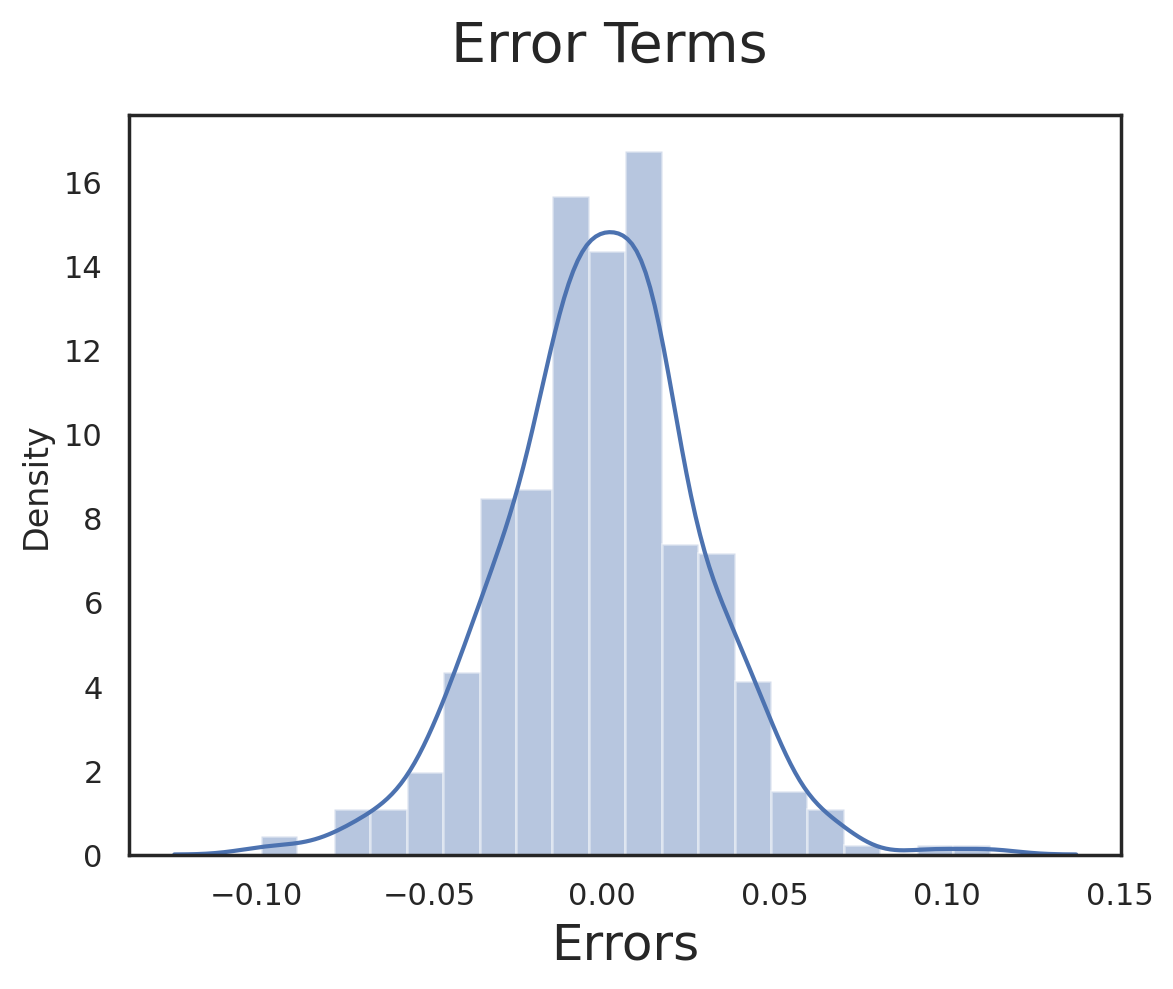

In [27]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading
plt.xlabel('Errors', fontsize = 18)                         # X-label

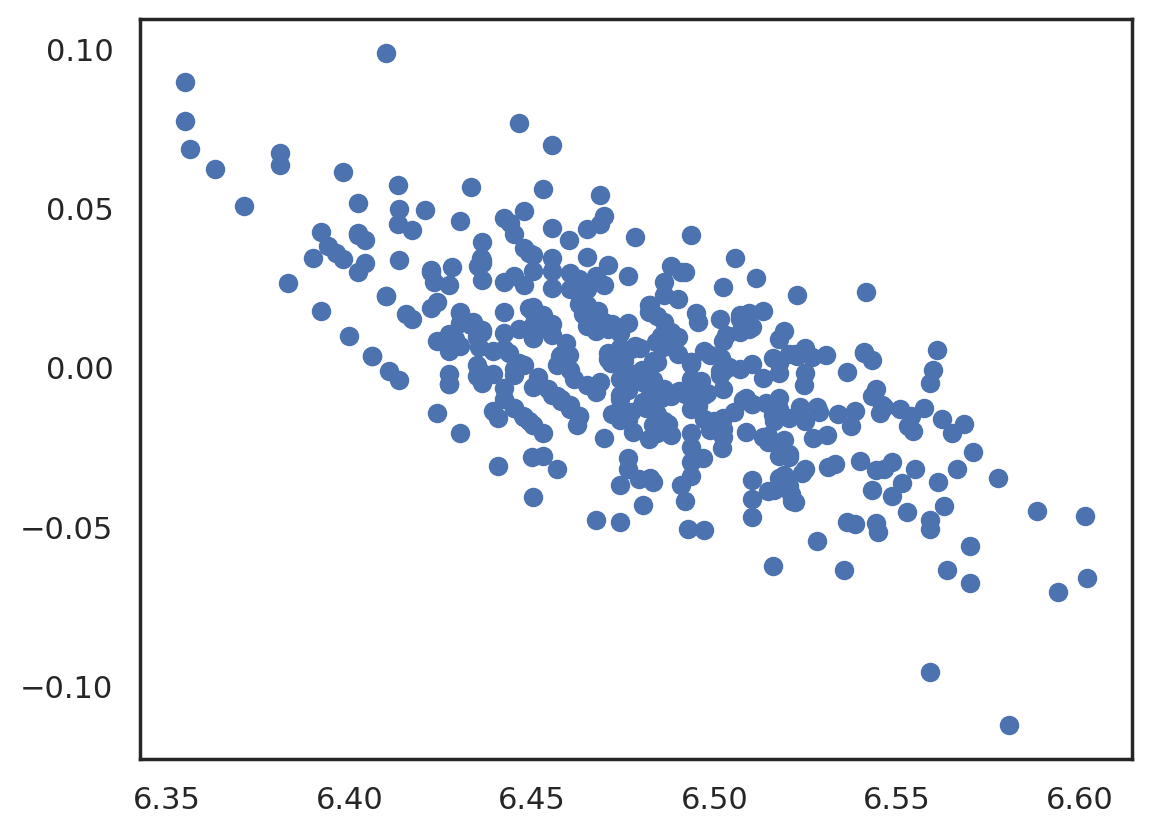

In [28]:
plt.scatter(y_train,res)
plt.show()

Overall, the distribution of these error terms indicates that your model is working well, with errors that are normally distributed and centered around zero. This is a sign that the model makes fairly accurate predictions and does not show significant bias.